In [110]:
import os
import clustering
import alignment
import fake_alignment
import cluster_visualization
import template_generating
import stat_calculator

%matplotlib inline

In [111]:
from _cluster_file_functions import extract_clusters, record_clusters
from self_stopped_genetic_algorithm import selfstop_genetic_algorithm

In [112]:
SEQUENCE_SOURCE_DIR = 'data1/'  # Folder with sequences
SEQUENCE_SOURCE_NAME = 'patient_traces_test'  # Name of sequences file without extention
OUT_DIR_CLUSTERS = 'data1/Clusters/'  # Folder for clusters
OUT_DIR_VISUALIZATION = 'data1/Paths'  # Folder with graphs
# OUTCOMES_FILE = 'data1/Outcomes.csv'
OUTCOMES_FILE = None
NODE_PARAMETERS_DIR = '_nodes_parameters/clinical_pathways_params'  # File with settings (names_dict.txt is required!!!)
EXPERT_TEMPLATE_FILE = 'data1/expert_templates.txt'  # Manual templates
GENETIC_TEMPLATE_FILE = 'data1/genetic_templates.txt'  # Empty file at start
ALPHABET = 'AFNIED'  # All possible states in any order
SEQUENCE_SEPARATOR = '\t'  # A separator in SEQUENCE_SOURCE_NAME
encoding = 'cp1251'

In [113]:
# read sequences
sequence_source_path = os.path.join(SEQUENCE_SOURCE_DIR, SEQUENCE_SOURCE_NAME + '.txt')
vectors, cases = extract_clusters(sequence_source_path, eval_=False, header=True,
                                      encoding=encoding, sep=SEQUENCE_SEPARATOR)
vectors = vectors[0]
cases = cases[0]
print(len(vectors), 'sequences')

82 sequences


In [114]:
OUT_DIR_CLUSTERS += SEQUENCE_SOURCE_NAME + '/'

#### Distance matrix

In [115]:
# filename of distance matrix 
distance_matrix_file = '{0}{1}_similarity_matrix.txt'.format(OUT_DIR_CLUSTERS,
                                                                 SEQUENCE_SOURCE_NAME)

lev_sim_matrix = clustering.get_similarity_matrix(distance_matrix_file, vectors)

0 lines in matrix calculated
1 lines in matrix calculated
2 lines in matrix calculated
3 lines in matrix calculated
4 lines in matrix calculated
5 lines in matrix calculated
6 lines in matrix calculated
7 lines in matrix calculated
8 lines in matrix calculated
9 lines in matrix calculated
10 lines in matrix calculated
11 lines in matrix calculated
12 lines in matrix calculated
13 lines in matrix calculated
14 lines in matrix calculated
15 lines in matrix calculated
16 lines in matrix calculated
17 lines in matrix calculated
18 lines in matrix calculated
19 lines in matrix calculated
20 lines in matrix calculated
21 lines in matrix calculated
22 lines in matrix calculated
23 lines in matrix calculated
24 lines in matrix calculated
25 lines in matrix calculated
26 lines in matrix calculated
27 lines in matrix calculated
28 lines in matrix calculated
29 lines in matrix calculated
30 lines in matrix calculated
31 lines in matrix calculated
32 lines in matrix calculated
33 lines in matrix c

In [116]:
MIN_NUM_CLUSTER = 3
MAX_NUM_CLUSTER = 10

3 clusters now
4 clusters now
5 clusters now
6 clusters now
7 clusters now
8 clusters now
9 clusters now
10 clusters now


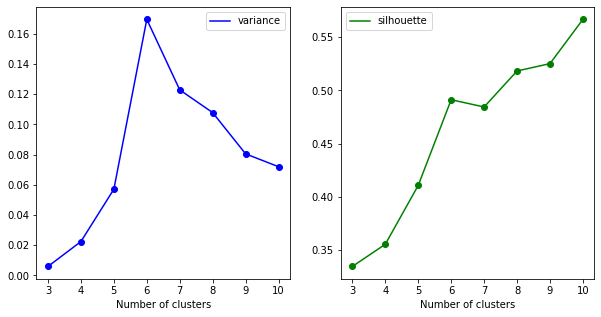

<Figure size 432x288 with 0 Axes>

In [117]:
var_metric, sill_metric = clustering.cluster_in_range(MIN_NUM_CLUSTER, 
                                   MAX_NUM_CLUSTER, 
                                   lev_sim_matrix, 
                                   vectors, 
                                   cases, 
                                   OUT_DIR_CLUSTERS)

clustering.visualize_cluster_metrics(MIN_NUM_CLUSTER, 
                                     OUT_DIR_CLUSTERS, 
                                     [var_metric, sill_metric], 
                                     ['variance', 'silhouette'])


In [118]:
# Choose a number of clusters using metrics above
num_of_clusters = 6

In [119]:
cluster_source = '{}KMeans{}.txt'.format(OUT_DIR_CLUSTERS, num_of_clusters)
clusters, cluster_cases = extract_clusters(cluster_source, eval_=False, sep='\t')

#### Genetic templates

In [120]:
template_dir = os.path.join(SEQUENCE_SOURCE_DIR, 'Template_generating', SEQUENCE_SOURCE_NAME,
                                        os.path.basename(cluster_source.split('.')[0]))

In [121]:
selfstop_genetic_algorithm(clusters, template_dir,
                           # max_num_generations=300,
                           alphabet=ALPHABET, mutation_num=10,
                           increment=10, animation_and_plot=False)

15 sequences in cluster #0
1 (5.1359) ... 2 (4.7539) ... 3 (6.411) ... 4 generations done
5 (7.5781) ... 6 (6.8897) ... 7 (6.8897) ... 8 (6.8897) ... 9 generations done
10 (7.2148) ... 11 (7.2148) ... 12 (7.2148) ... 13 (7.2148) ... 14 generations done
15 (6.8532) ... 16 (8.8541) ... 17 (8.8541) ... 18 (8.8541) ... 19 generations done
20 (10.8111) ... 21 (11.8116) ... 22 (11.8116) ... 23 (12.812) ... 24 generations done
25 (12.812) ... 26 (13.8125) ... 27 (13.8125) ... 28 (13.8125) ... 29 generations done
30 (15.7982) ... 31 (15.7982) ... 32 (15.7982) ... 33 (15.7982) ... 34 generations done
35 (15.7982) ... 36 (15.7982) ... 37 (15.7982) ... 38 (15.7982) ... 
12 sequences in cluster #1
1 (4.8527) ... 2 (7.4114) ... 3 (8.068) ... 4 generations done
5 (9.737) ... 6 (10.7374) ... 7 (10.7374) ... 8 (11.7909) ... 9 generations done
10 (13.1323) ... 11 (13.1323) ... 12 (13.5307) ... 13 (13.5307) ... 14 generations done
15 (13.5307) ... 16 (14.531) ... 17 (14.531) ... 18 (14.531) ... 19 gener

In [122]:
template_generating.choose_best_templates(template_dir, SEQUENCE_SOURCE_DIR, cluster_source,
                                          os.path.basename(GENETIC_TEMPLATE_FILE))



Cluster|Size|Aligned
      0|  15|     15
      1|  12|     12
      2|  15|     15
      3|  17|     17
      4|  17|     17
      5|   6|      6


In [123]:
template_file = GENETIC_TEMPLATE_FILE

In [124]:
file_out = cluster_source.split('.')[0] + '_full_alignment.txt'

#### Draw clusters with graphviz

In [125]:
num_state = alignment.align_all(clusters, cluster_cases, file_out, template_file)
this_clusters, this_cases = extract_clusters(file_out, sep='\t', eval_=False)

In [126]:
def draw_all_clusters(add_name=''):
    graphs_paths = []
    for i, cluster in enumerate(this_clusters):
        graph = cluster_visualization.Graph(cluster, 
                                            this_cases[i],
                                            cluster_visualization.get_file_name(
                                                file_out) + add_name, 
                                            i, 
                                            num_state, 
                                            NODE_PARAMETERS_DIR, 
                                            OUTCOMES_FILE,
                                            add_figures=False)
        graph.collect_edges()    

        try:
            path_to_grpah = graph.to_gv(OUT_DIR_VISUALIZATION, 0, 0.1)
            graphs_paths.append(path_to_grpah)
        except AssertionError:
            print('Cluster #{} is empty'.format(i))
    return graphs_paths

In [130]:
graphs_paths = draw_all_clusters()

#### Clusters review

In [131]:
import ipywidgets as widgets
from IPython.display import Image
from ipywidgets import interact, interactive, fixed, interact_manual

In [132]:
path_with_graphs = os.path.split(graphs_paths[0])[0]

In [133]:
def show_chains_with_clusters(path_with_graphs):
    
    def display_chain(x, width):
        return Image(os.path.join(path_with_graphs, x), width = width, height = 300)
    
    png_graphs = [f for f in os.listdir(path_with_graphs) if f[-3:] == 'png']
    

    x_widget =  widgets.Dropdown(
        options=png_graphs,
        value=png_graphs[0],
        description='Кластер №',
        disabled=False,
    )



    width_slider = widgets.IntSlider(min=100, 
                                     max=1000, 
                                     step=1, 
                                     value=700,
                                    description='Размер:')

    
    interact(display_chain,
             x=x_widget,
             width=width_slider,
            );

In [134]:
show_chains_with_clusters(path_with_graphs)

interactive(children=(Dropdown(description='Кластер №', options=('Cluster_0.gv.png', 'Cluster_1.gv.png', 'Clus…

#### Statistics 

In [135]:
import pandas as pd
from stat_calculator import cluster_report

In [136]:
cluster_report(cluster_source, file_out)

,size,outliers,outliers_%,mean_seq_len
cluster,,,,
0,15,0,0.0,5.20
1,12,0,0.0,6.25
2,15,0,0.0,3.67
3,17,0,0.0,4.00
4,17,0,0.0,5.00
5,6,0,0.0,2.00


#### Specialists templates

In [137]:
template_file_spec = EXPERT_TEMPLATE_FILE
file_out_spec = cluster_source.split('.')[0] + '_full_alignment_specialist.txt'
num_state = alignment.align_all(clusters, cluster_cases, file_out_spec, template_file_spec)
this_clusters, this_cases = extract_clusters(file_out_spec, sep='\t', eval_=False)

graphs_paths_spec = draw_all_clusters(add_name='_spec')


NON-ALIGNED: AIFID A__IF__
NON-ALIGNED: AEIFED A____E_
NON-ALIGNED: AINFED A__I___
NON-ALIGNED: AEFIF A____E_
NON-ALIGNED: AFNFEFD AFN_FE_
NON-ALIGNED: AFIFEIF AF_IFE_
NON-ALIGNED: AFENEFE AF___E_
NON-ALIGNED: AFIFEFD AF_IFE_
NON-ALIGNED: AFIFEFD AF_IFE_
NON-ALIGNED: AIFIFED A__IF__
NON-ALIGNED: AFENE AF___E_
NON-ALIGNED: AFENE AF___E_
NON-ALIGNED: ANIFNF A_NIF__
NON-ALIGNED: AFINFEF AF_I___
NON-ALIGNED: AEFD A____E_
NON-ALIGNED: AFEFD AF___E_
NON-ALIGNED: AFEFD AF___E_
NON-ALIGNED: ANFEFD A_N_FE_
NON-ALIGNED: AFEFD AF___E_
NON-ALIGNED: AFEFD AF___E_
NON-ALIGNED: AFEND AF___E_


In [138]:
path_with_graphs_spec = os.path.split(graphs_paths_spec[0])[0]
show_chains_with_clusters(path_with_graphs_spec)

interactive(children=(Dropdown(description='Кластер №', options=('Cluster_0.gv.png', 'Cluster_1.gv.png', 'Clus…

In [139]:
cluster_report(cluster_source, file_out_spec)

,size,outliers,outliers_%,mean_seq_len
cluster,,,,
0,15,3,20.00,5.20
1,12,11,91.67,6.25
2,15,1,6.67,3.67
3,17,0,0.00,4.00
4,17,6,35.29,5.00
5,6,0,0.00,2.00


#### Fake aligment (Cyclic)

In [140]:
file_alignment = cluster_source.split('.')[0] + '_fake_alignment.txt'
aligned_clusters = [[] for i in range(len(clusters))]
for i, cluster in enumerate(clusters):
    cyclic_alignment = fake_alignment.CyclicAlignment()
    for sequence in cluster:
        aligned_clusters[i].append(cyclic_alignment.align(sequence))

record_clusters(file_alignment, aligned_clusters, cluster_cases, sep='\t')

fake_graphs_append = []
for i, cluster in enumerate(aligned_clusters):
    graph = cluster_visualization.Graph(cluster, cluster_cases[i],
                                        cluster_visualization.get_file_name(file_alignment), i, 1,
                                        NODE_PARAMETERS_DIR, OUTCOMES_FILE)
    graph.collect_edges()
    fake_graphs_append.append(graph.to_gv(OUT_DIR_VISUALIZATION, 0.0, 0.3))

In [141]:
path_with_fake_graphs = os.path.split(fake_graphs_append[0])[0]
show_chains_with_clusters(path_with_fake_graphs)

interactive(children=(Dropdown(description='Кластер №', options=('Cluster_0.gv.png', 'Cluster_1.gv.png', 'Clus…

In [142]:
cluster_report(cluster_source, file_alignment)





,size,outliers,outliers_%,mean_seq_len
cluster,,,,
0,15,0,0.0,5.20
1,12,0,0.0,6.25
2,15,0,0.0,3.67
3,17,0,0.0,4.00
4,17,0,0.0,5.00
5,6,0,0.0,2.00
